# This notebook will focus on:

- Data loading and exploration

- Data cleaning (handling missing values, outliers, etc.)

- Initial checks and visualizations (e.g., distribution of target, correlation analysis, etc.)

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys
import os
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')  # To avoid non-critical warnings

### Input original file

In [2]:
path = '../data/raw/heart_2022_with_nans.csv'

In [4]:
# read data
df = pd.read_csv(path ,sep=',',encoding='utf-8')
df.sample(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
149507,Maine,Female,Fair,10.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,1 to 5,Yes,...,1.55,72.57,30.23,Yes,NaN,Yes,No,NaN,No,No
115230,Iowa,Female,Fair,0.0,2.0,Within past year (anytime less than 12 months ...,No,5.0,All,No,...,1.57,102.06,41.15,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,Yes
329116,South Carolina,Male,Excellent,0.0,0.0,5 or more years ago,Yes,7.0,1 to 5,No,...,1.85,102.06,29.68,Yes,No,No,No,"Yes, received tetanus shot but not sure what type",No,No
173411,Massachusetts,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,1.73,72.57,24.33,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
288344,Ohio,Female,Good,10.0,30.0,Within past year (anytime less than 12 months ...,No,5.0,1 to 5,No,...,1.75,111.13,36.18,Yes,Yes,No,Yes,"Yes, received Tdap",No,No


In [5]:
print(f"Data Shape: {df.shape}")

Data Shape: (445132, 40)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [7]:
# Check for missing values
print(df.isnull().sum())

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

### Missing Value Cleaning

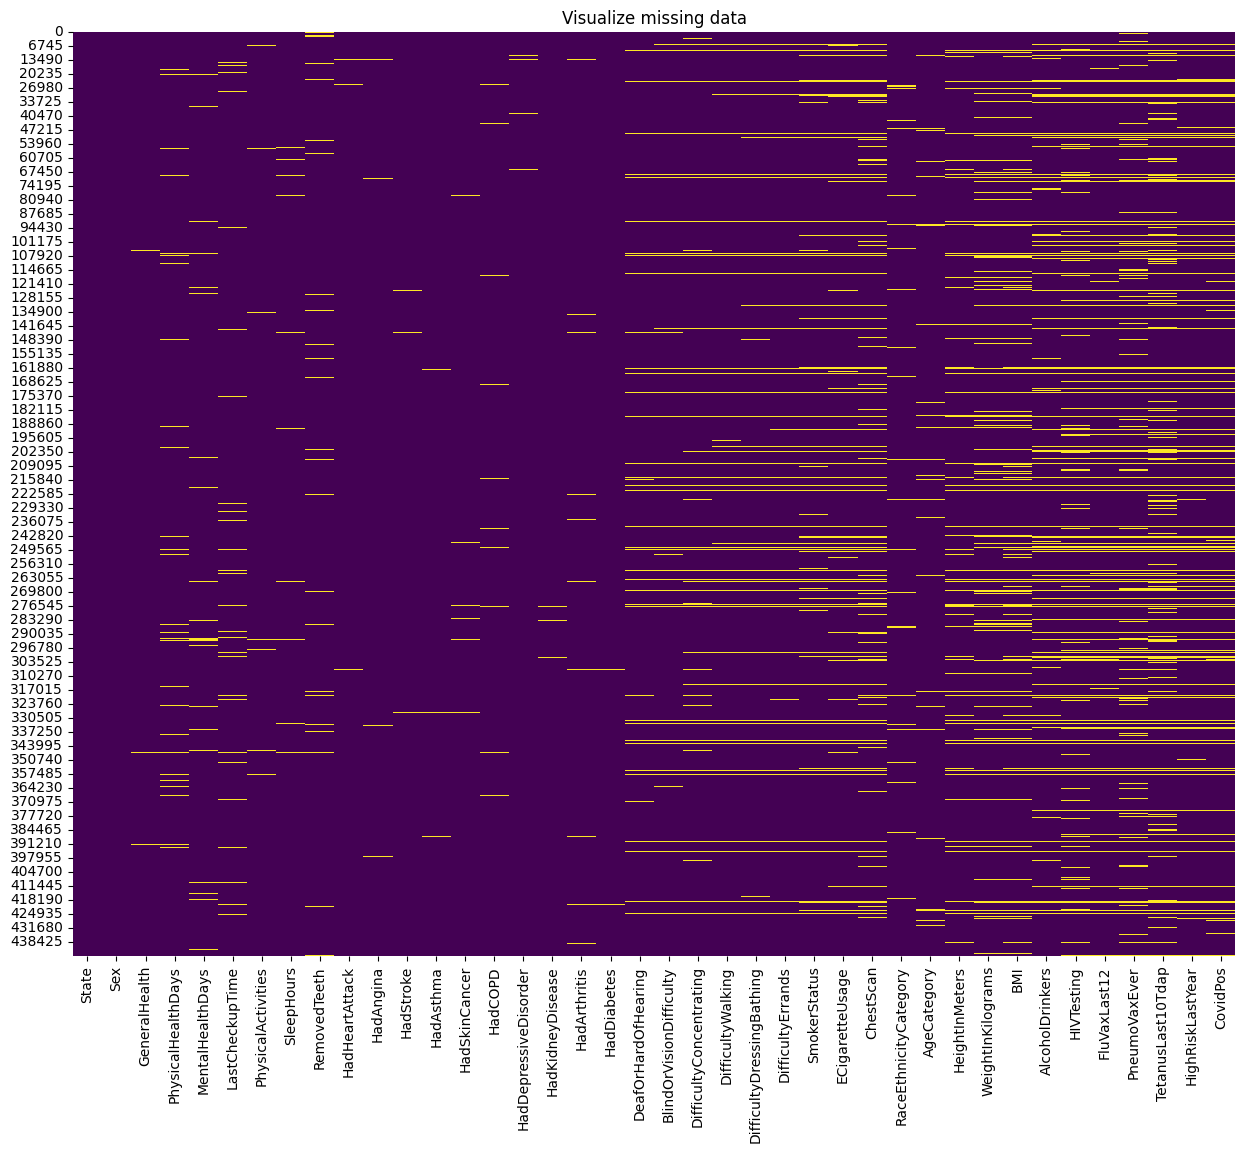

In [8]:
# Visualize missing data
plt.figure(figsize=(15,12))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualize missing data')
plt.show()

### 視情況刪除

In [9]:
# Data cleaning - Handle missing values
sys.path.append('..')  

# Import function
from src.data_preprocessing.clean_data import clean_data

input_path = '../data/raw/heart_2022_with_nans.csv'
output_path = '../data/cleaned/heart_2022_cleaned.csv'

clean_data(input_path, output_path, target_column = "HadHeartAttack")
print("Filling missing values with median or mode, depending on the data type.")

Loading data...
Columns before processing: ['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos']
Handling missing values...
Dropping rows where 'HadHeartAttack' is NaN...
Dropped 3065 rows.
Missing values after processing:
State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           

> Other cleaning method ...

In [9]:
# set the group
group_cols = ['GeneralHealth', 'HadAngina', 'HadStroke', "AgeCategory"]

for col in group_cols:
    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df[col] = df[col].fillna(df[col].mode().iloc[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df_result = df.copy()

for col in df.columns:
    if col in group_cols or df[col].isnull().sum() == 0:
        continue

    if df[col].dtype == 'object' or str(df[col].dtype) == 'category':
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)
        if df_result[col].isnull().sum() > 0:
            fallback = df_result[col].mode()
            if not fallback.empty:
                df_result[col] = df_result[col].fillna(fallback.iloc[0])
    else:
        df_result[col] = df_result.groupby(group_cols)[col].transform(
            lambda x: x.fillna(x.median()))
        if df_result[col].isnull().sum() > 0:
            df_result[col] = df_result[col].fillna(df_result[col].median())

df = pd.DataFrame(df_result)
df.to_csv("../data/cleaned/heart_2022_cleaned.csv", index=False)

In [10]:
new_path = '../data/cleaned/heart_2022_cleaned.csv'
df = pd.read_csv(new_path ,sep=',',encoding='utf-8')

### Numerical Features Distribution

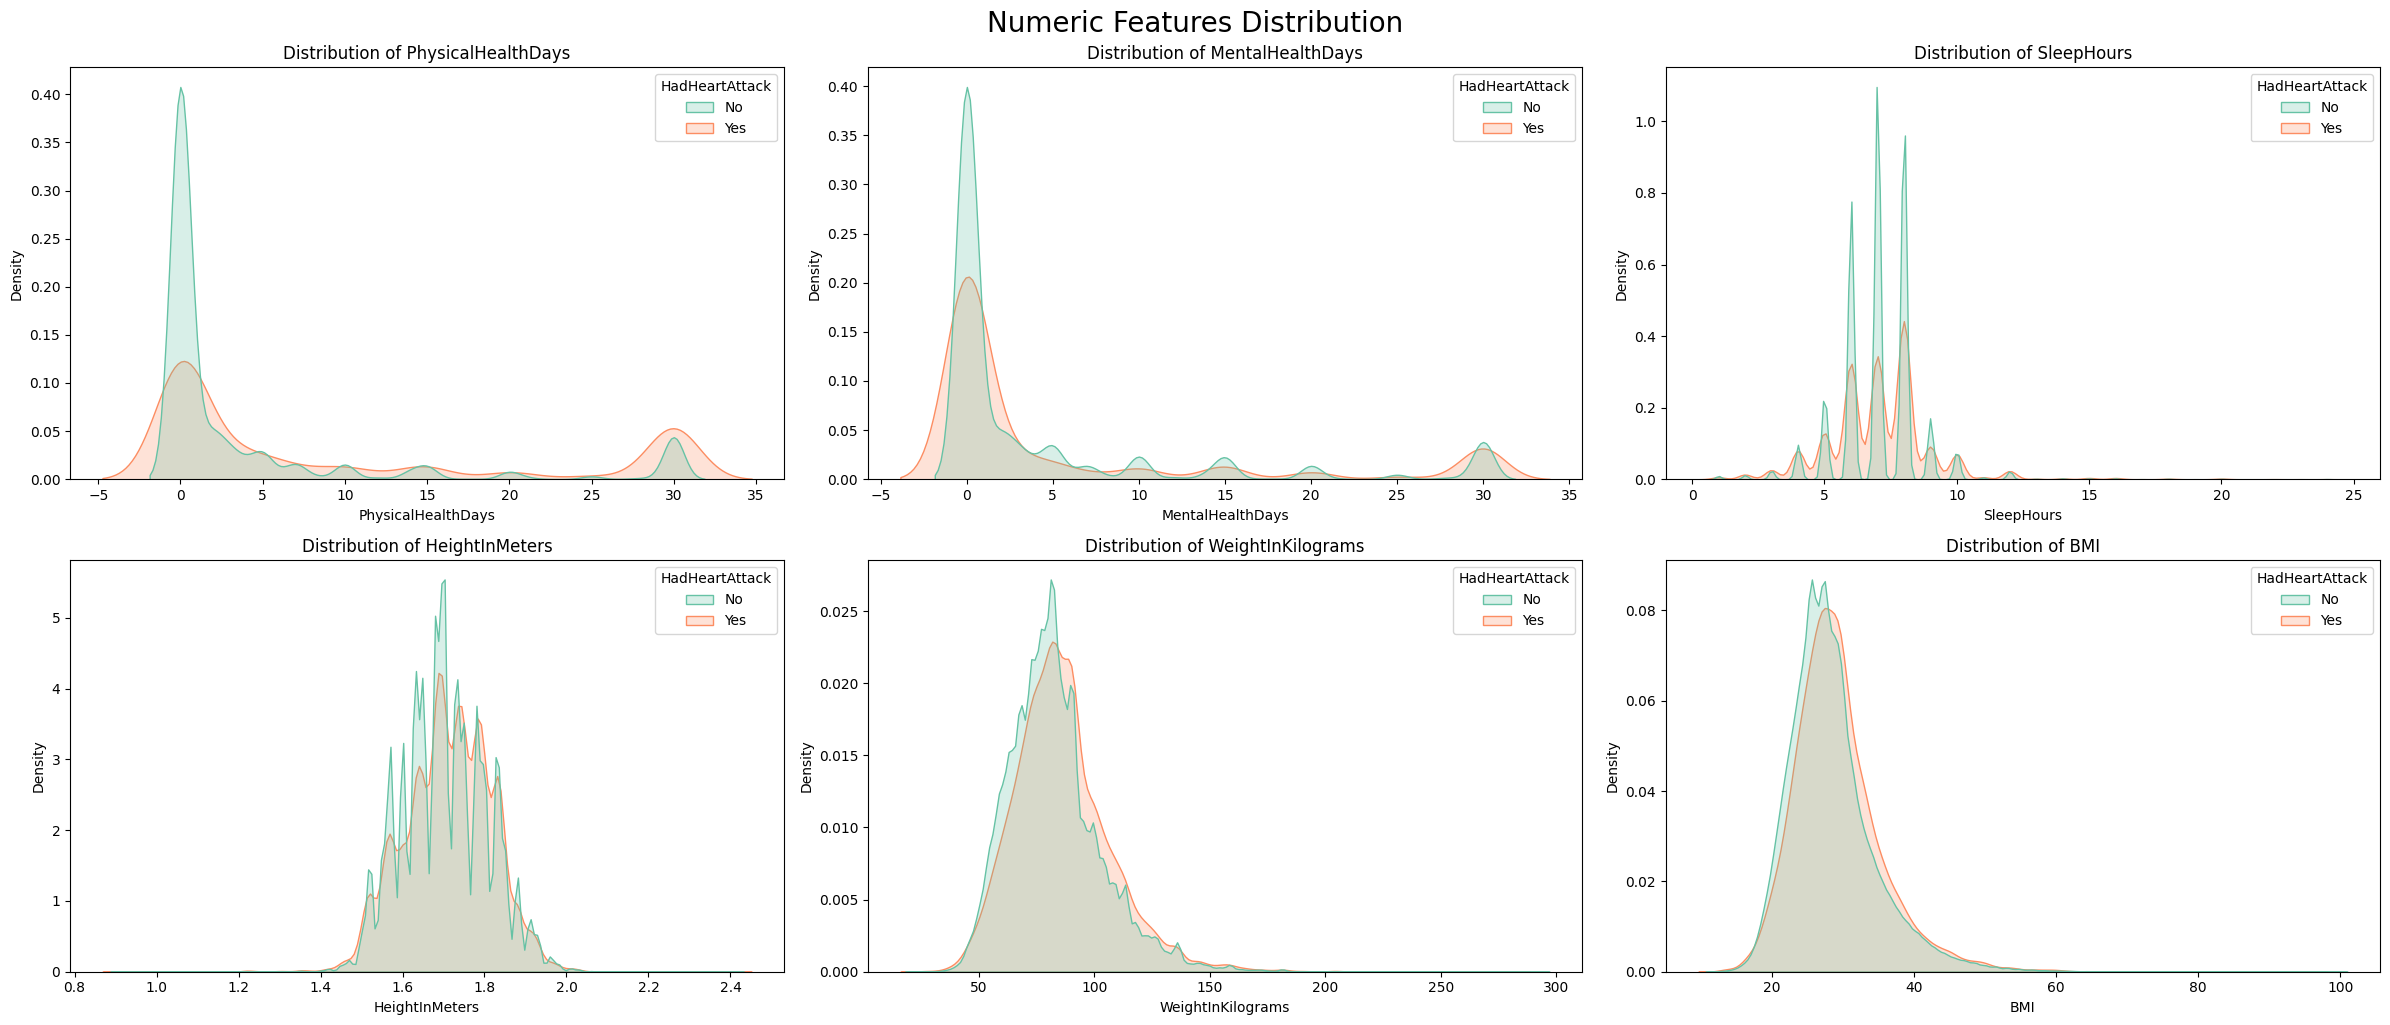

In [10]:
# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 5 * n_rows))
axes = axes.flatten()
plt.title('Numeric Features Distribution', fontsize=20, y=1.02)
for idx, col in enumerate(numerical_features):
    sns.kdeplot(data=df, x=col, hue='HadHeartAttack', fill=True, common_norm=False, palette='Set2', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.suptitle('Numeric Features Distribution', fontsize=20, y=1.02)
plt.show()


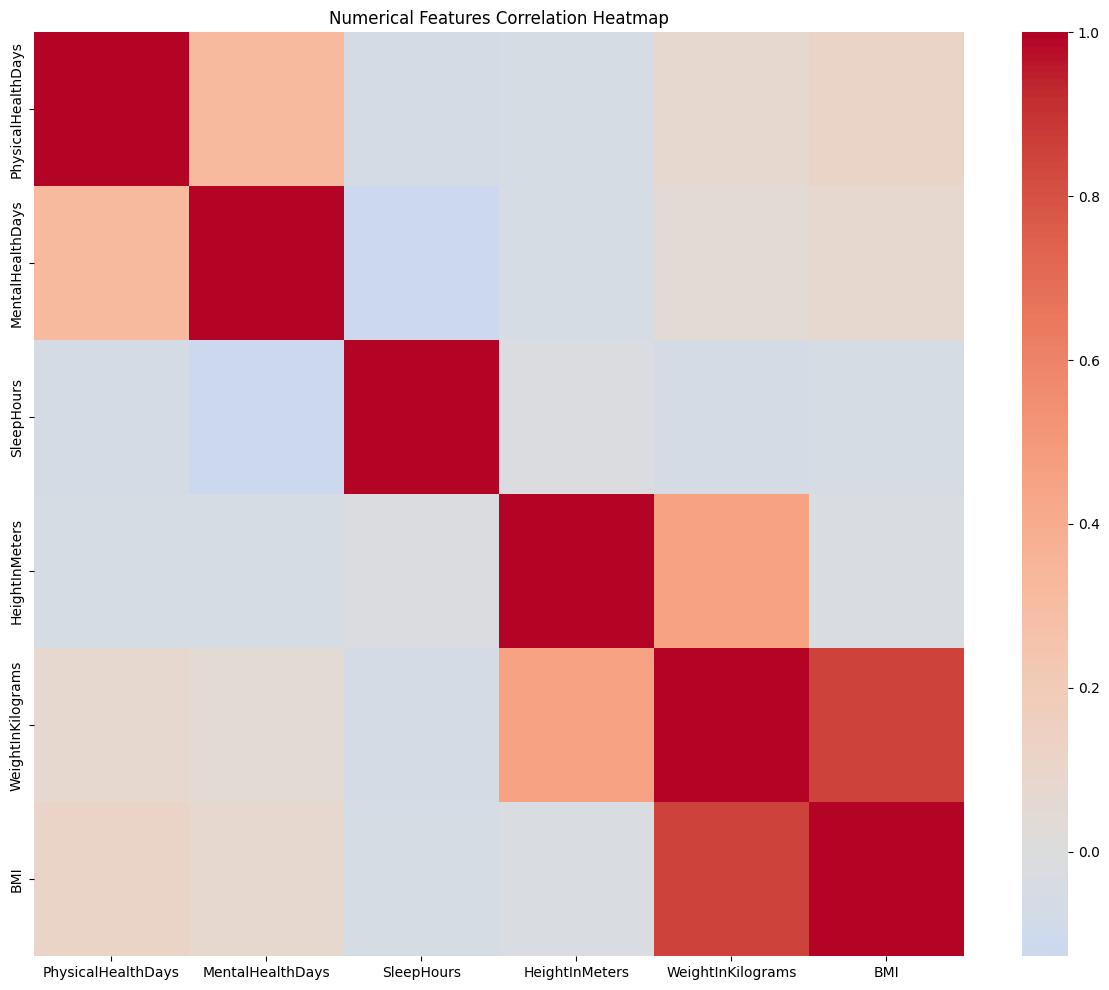

In [11]:
# Numerical Features Correlation
plt.figure(figsize=(15,12))
corr = df.select_dtypes(include = 'number').corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

### Binning
> Binning some numerical features for better insights

In [11]:
# BMI Category
bins = [0, 18.5, 25, 30, 35, np.inf]
labels = ['Underweight', 'Normal weight',
          'Overweight', 'Obese', 'Extremly Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins, labels=labels)

df["BMI_Category"].value_counts()


BMI_Category
Overweight        180439
Normal weight     119411
Obese              83545
Extremly Obese     54954
Underweight         6783
Name: count, dtype: int64

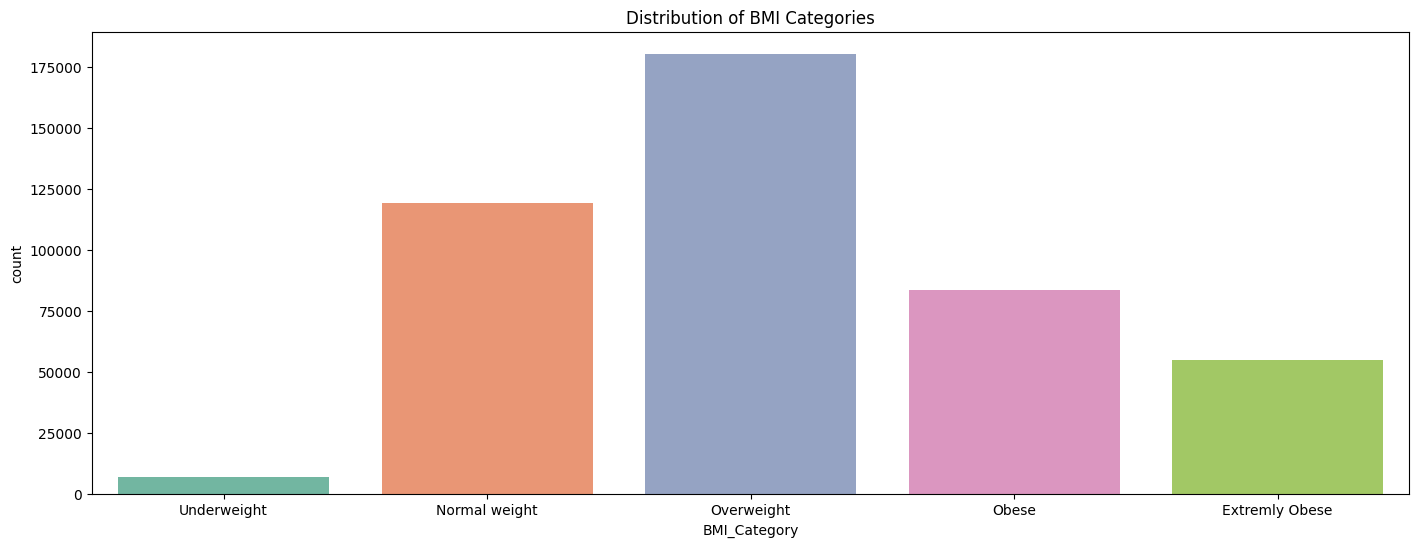

In [13]:
# Plotting BMI Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='BMI_Category', data=df, palette='Set2')
plt.title('Distribution of BMI Categories')
plt.show()

In [12]:
# SleepHours Category
sleep_bins = [0, 4, 6, 8, 10, np.inf]
sleep_labels = ['Very Short Sleep', 'Short Sleep', 'Normal Sleep', 'Long Sleep', 'Very Long Sleep']

df['SleepHours_Category'] = pd.cut(df['SleepHours'], bins=sleep_bins, labels=sleep_labels)

df['SleepHours_Category'].value_counts()


SleepHours_Category
Normal Sleep        263143
Short Sleep         126681
Long Sleep           31669
Very Short Sleep     18396
Very Long Sleep       5243
Name: count, dtype: int64

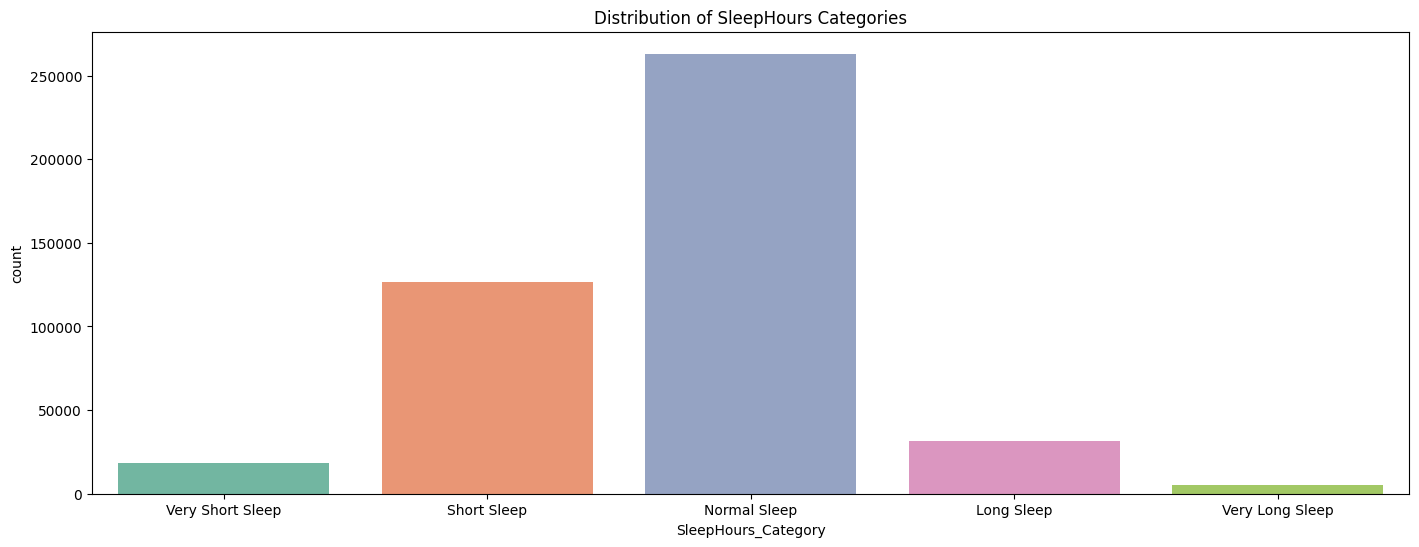

In [15]:
# Plotting SleepHours Category distribution
plt.figure(figsize=(17, 6))
sns.countplot(x='SleepHours_Category', data=df, palette='Set2')
plt.title('Distribution of SleepHours Categories')
plt.show()

> Adding more binning features ...

### Categorical features

In [13]:
df.describe(include='object').T

,count,unique,top,freq
State,445132,54,Washington,26152
Sex,445132,2,Female,235893
GeneralHealth,445132,5,Very good,149642
LastCheckupTime,445132,4,Within past year (anytime less than 12 months ...,359251
PhysicalActivities,445132,2,Yes,338509
RemovedTeeth,445132,4,None of them,239669
HadHeartAttack,445132,2,No,419900
HadAngina,445132,2,No,418581
HadStroke,445132,2,No,425893
HadAsthma,445132,2,No,378437


In [14]:
le = LabelEncoder()

df['HadHeartAttack'] = le.fit_transform(df['HadHeartAttack'])

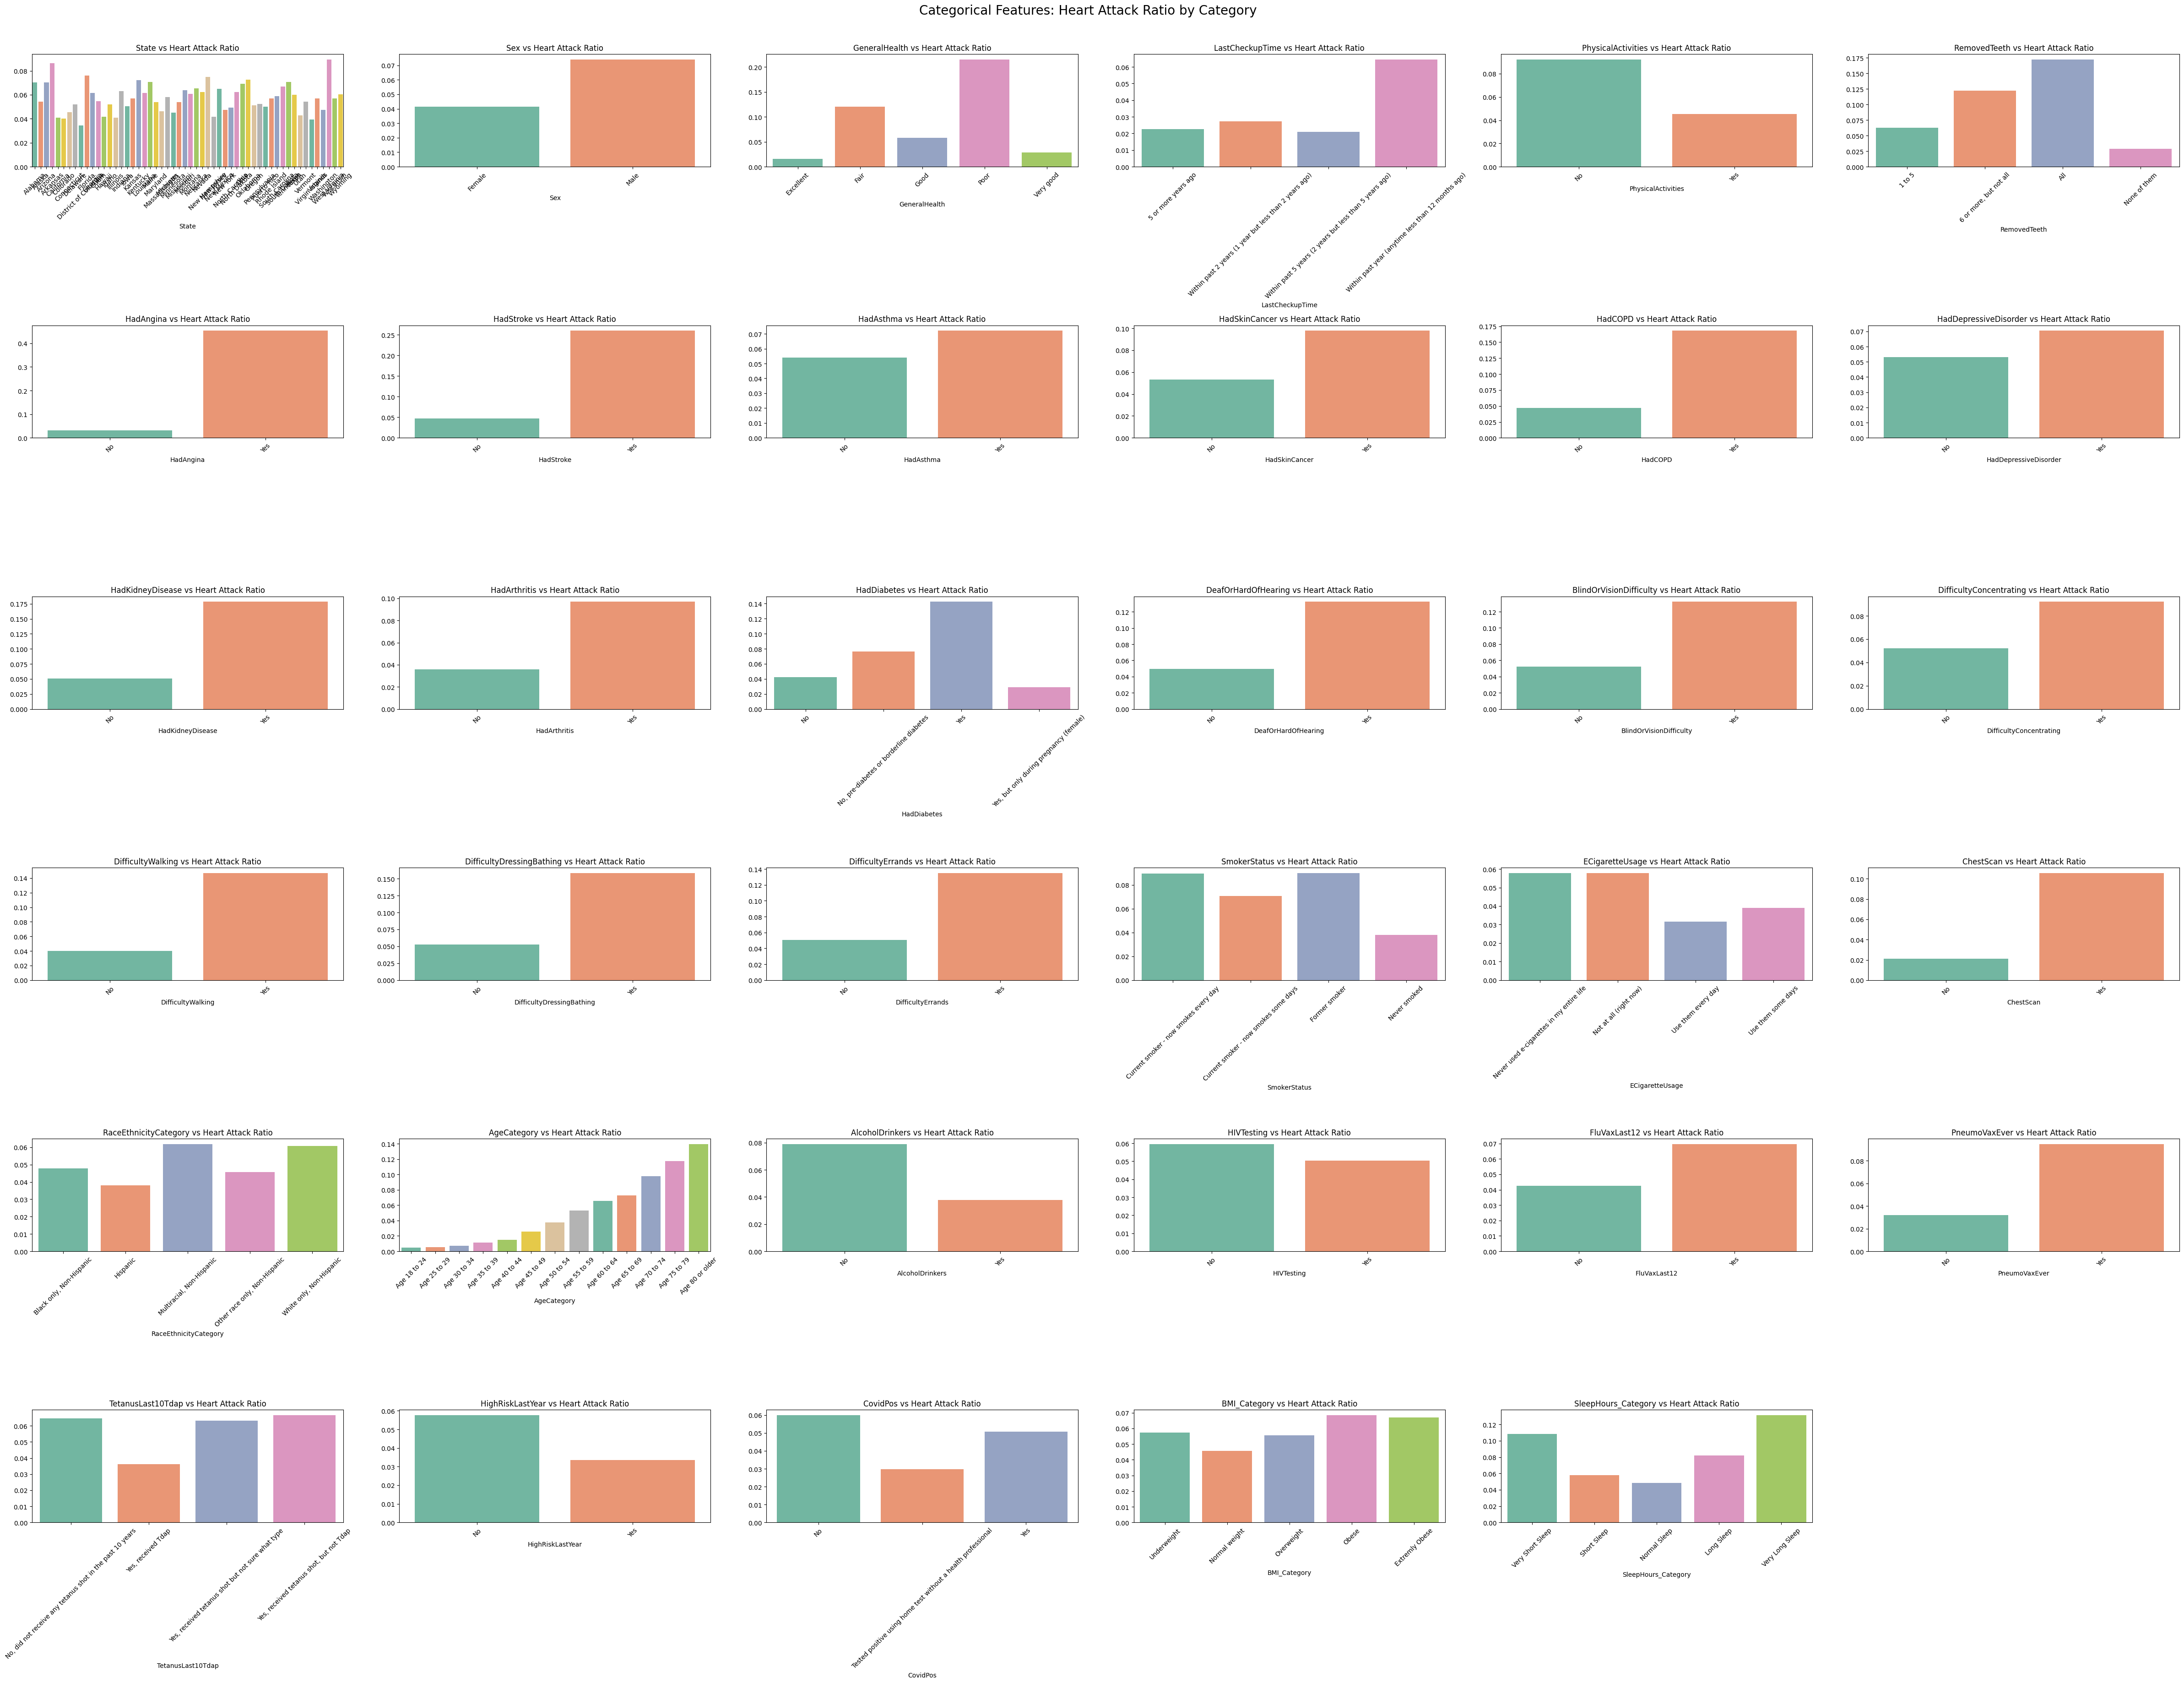

In [18]:
# Categorical features
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a figure with appropriate size
n_cols = 6
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(8 * n_cols, 6 * n_rows))
axes = axes.flatten()

# Loop through categorical features
for idx, col in enumerate(categorical_features):
    # Calculate the ratio of HadHeartAttack = 1 for each category
    category_ratio = df.groupby(col)['HadHeartAttack'].mean()
    
    # Plot the ratios for each category
    sns.barplot(x=category_ratio.index, y=category_ratio.values, palette='Set2', ax=axes[idx])
    
    axes[idx].set_title(f'{col} vs Heart Attack Ratio')
    axes[idx].tick_params(axis='x', rotation=45)

# Remove extra subplots if there are more axes than features
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.suptitle('Categorical Features: Heart Attack Ratio by Category', fontsize=20, y=1.02)
plt.show()


### EDA

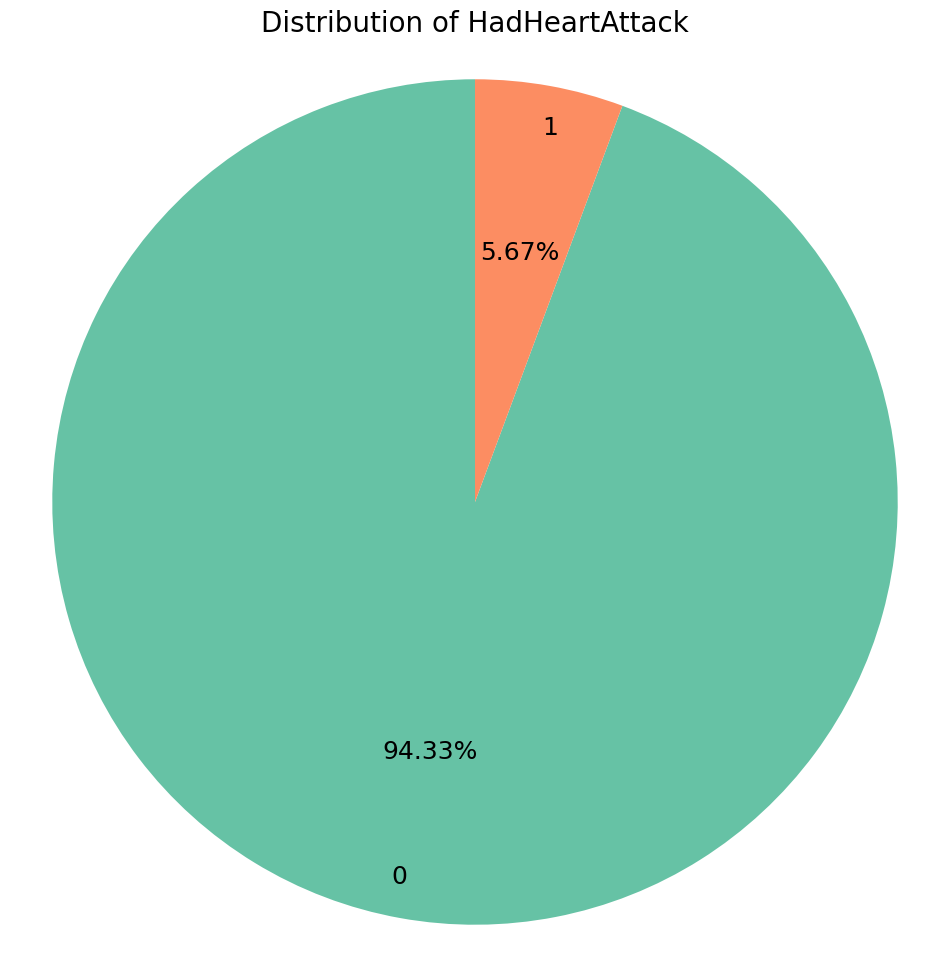

In [19]:
counts = df['HadHeartAttack'].value_counts()
palette_color = sns.color_palette('Set2')
plt.figure(figsize=(12,12))
plt.pie(counts, colors=palette_color, labels=counts.index,
        autopct='%1.2f%%', startangle=90, textprops={'fontsize': 18}, labeldistance=0.9)

plt.title('Distribution of HadHeartAttack', fontsize=20)
plt.axis('equal')
plt.show()


> Only there are 5.68% patients that have heart disease


#### Map

In [15]:
df['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Guam', 'Puerto Rico',
       'Virgin Islands'], dtype=object)

In [21]:
# Full state name to abbreviation mapping
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY',
    'Guam': 'GU', 'Puerto Rico': 'PR', 'Virgin Islands': 'VI'
}

df['State'] = df['State'].map(us_state_abbrev)

In [22]:
df['State']

0         AL
1         AL
2         AL
3         AL
4         AL
          ..
445127    VI
445128    VI
445129    VI
445130    VI
445131    VI
Name: State, Length: 445132, dtype: object

In [41]:
import plotly.graph_objects as go
# Keep only states that Plotly can map (excludes Guam, PR, VI)
valid_states = set(us_state_abbrev.keys()) - {'Guam', 'Puerto Rico', 'Virgin Islands'}
df_filtered = df[df['State'].isin(valid_states)].copy()


# Add abbreviations
df_filtered['StateAbbr'] = df_filtered['State'].map(us_state_abbrev)
state_rates = df.groupby('State')['HadHeartAttack'].mean().reset_index()
state_rates['HeartAttackRate'] = state_rates['HadHeartAttack'] * 100  # percentage
state_rates['FormattedRate'] = state_rates['HeartAttackRate'].map(lambda x: f"{x:.2f}%") 

data = []
layout = dict(font=dict(size=8), geo=dict(scope="usa", projection=dict(type="albers usa")))

data.append(go.Choropleth(locations=state_rates['State'], z=state_rates['HeartAttackRate'], locationmode="USA-states", colorscale="Bluyl"))
data.append(go.Scattergeo(locations=state_rates['State'], text=state_rates['FormattedRate'], locationmode="USA-states", mode="text"))

fig = go.Figure(data=data, layout=layout)

fig.update_layout(
    margin=dict(r=0, l=0, t=50, b=0),
    title= 'Heart Attack Rate by U.S. State'
)

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

#### Some 2 combined features may have better significance

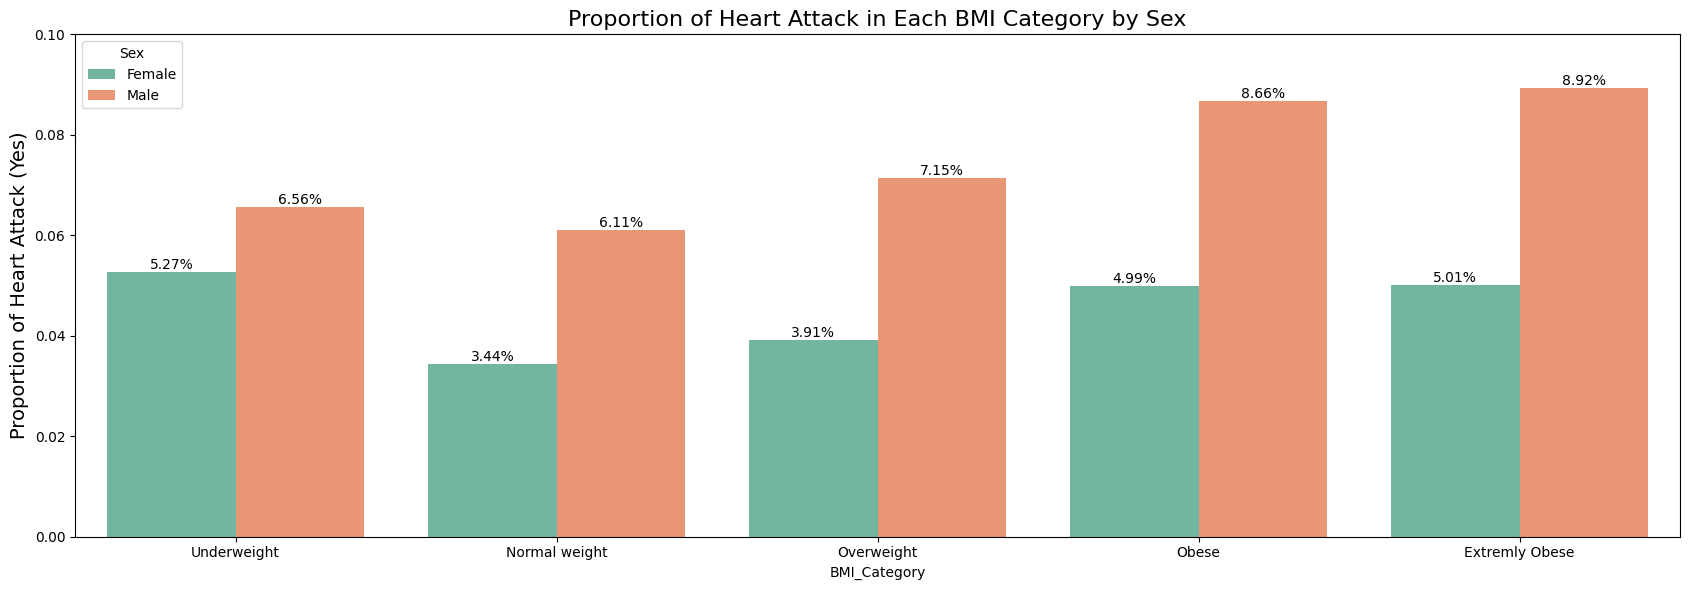

In [29]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='BMI_Category',
    y='HadHeartAttack',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each BMI Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### The age of patients ?

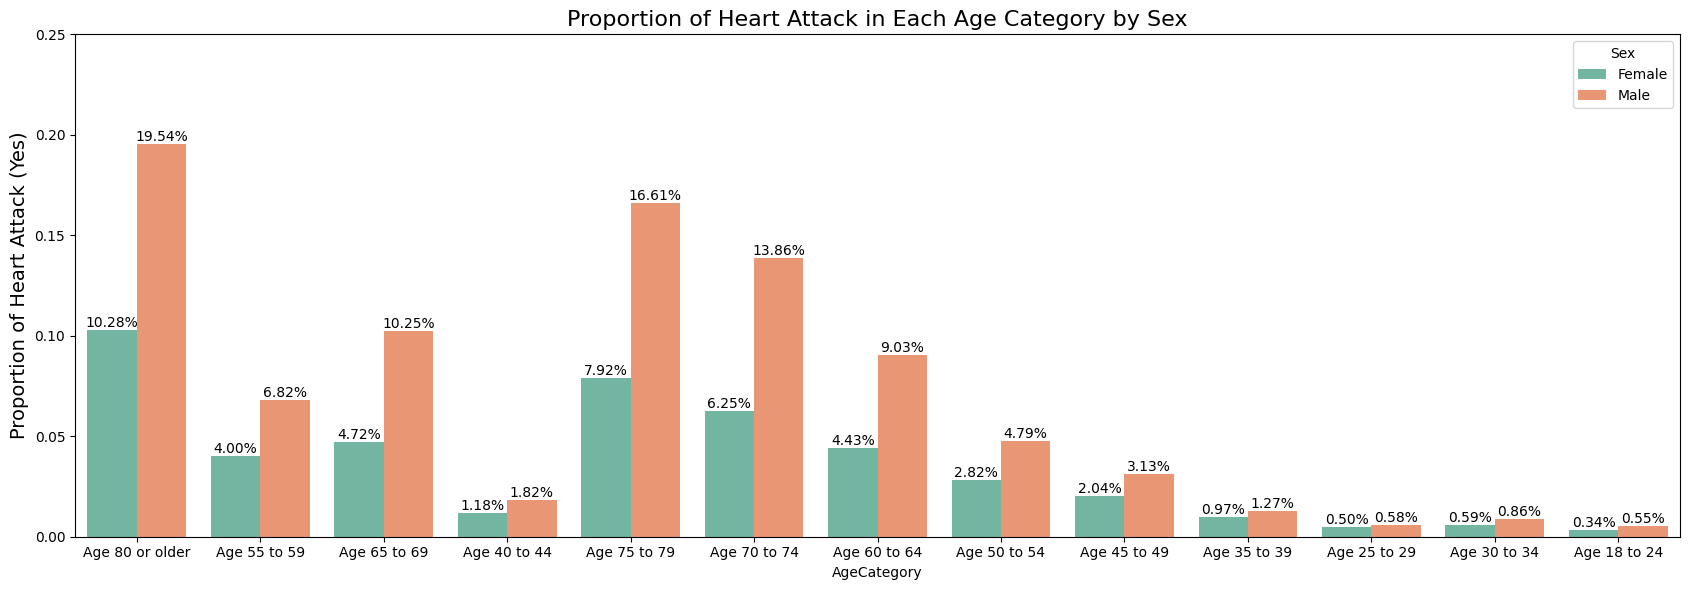

In [16]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='AgeCategory',
    y='HadHeartAttack',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Age Category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.25) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### How many patients that have heart disease are smoking ?

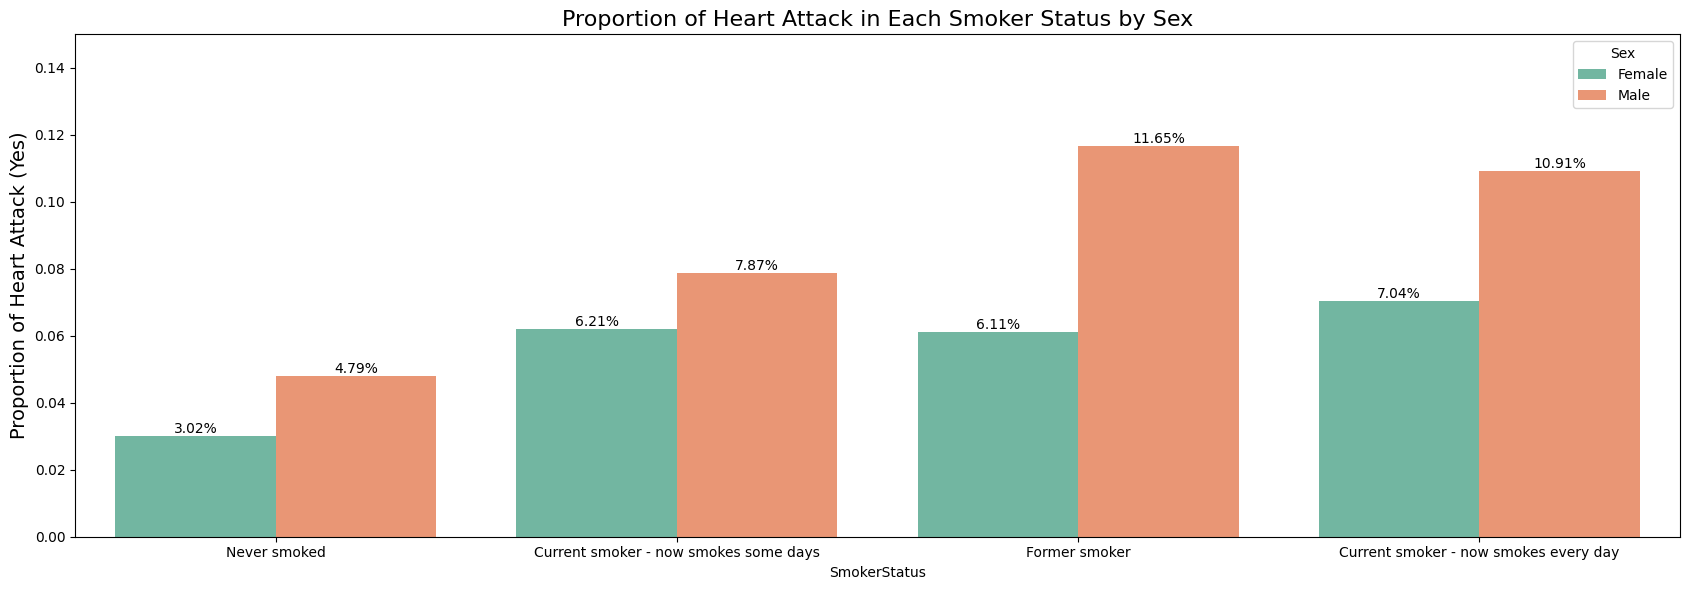

In [31]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SmokerStatus',
    y='HadHeartAttack',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Smoker Status by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.15) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Sleep vs Heart Disease

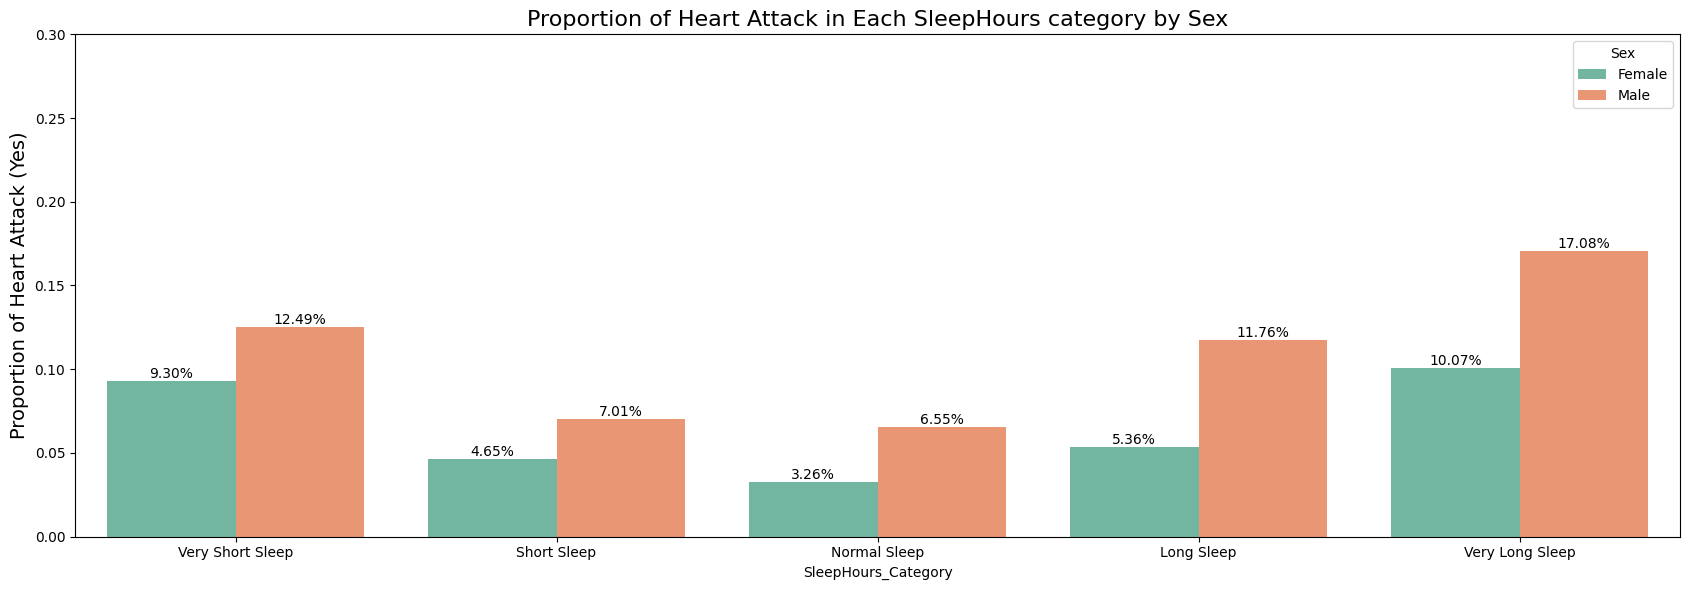

In [32]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='SleepHours_Category',
    y='HadHeartAttack',
    hue='Sex',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each SleepHours category by Sex', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.3) 
plt.legend(title='Sex')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Checkup time with Astham

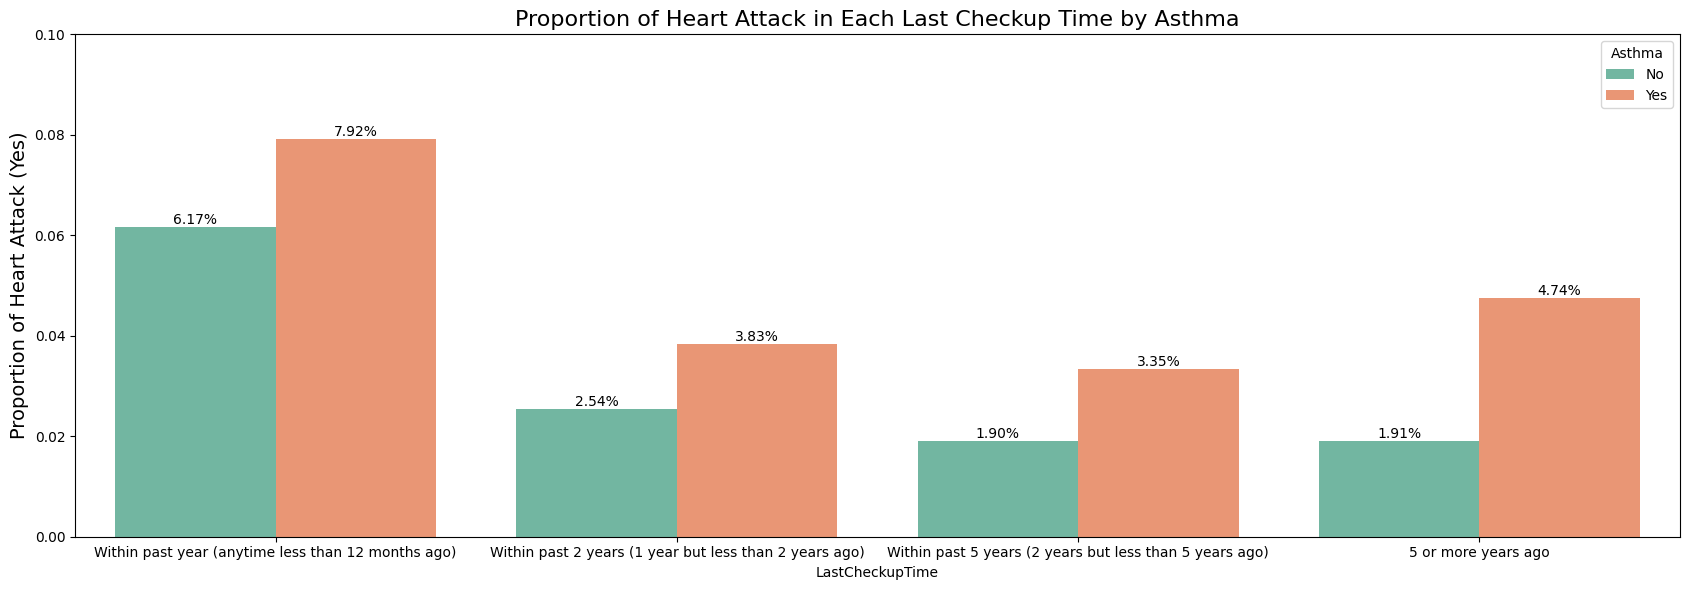

In [33]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='LastCheckupTime',
    y='HadHeartAttack',
    hue='HadAsthma',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Last Checkup Time by Asthma', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Asthma')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### ECigarette and Dinking habits with heart disease

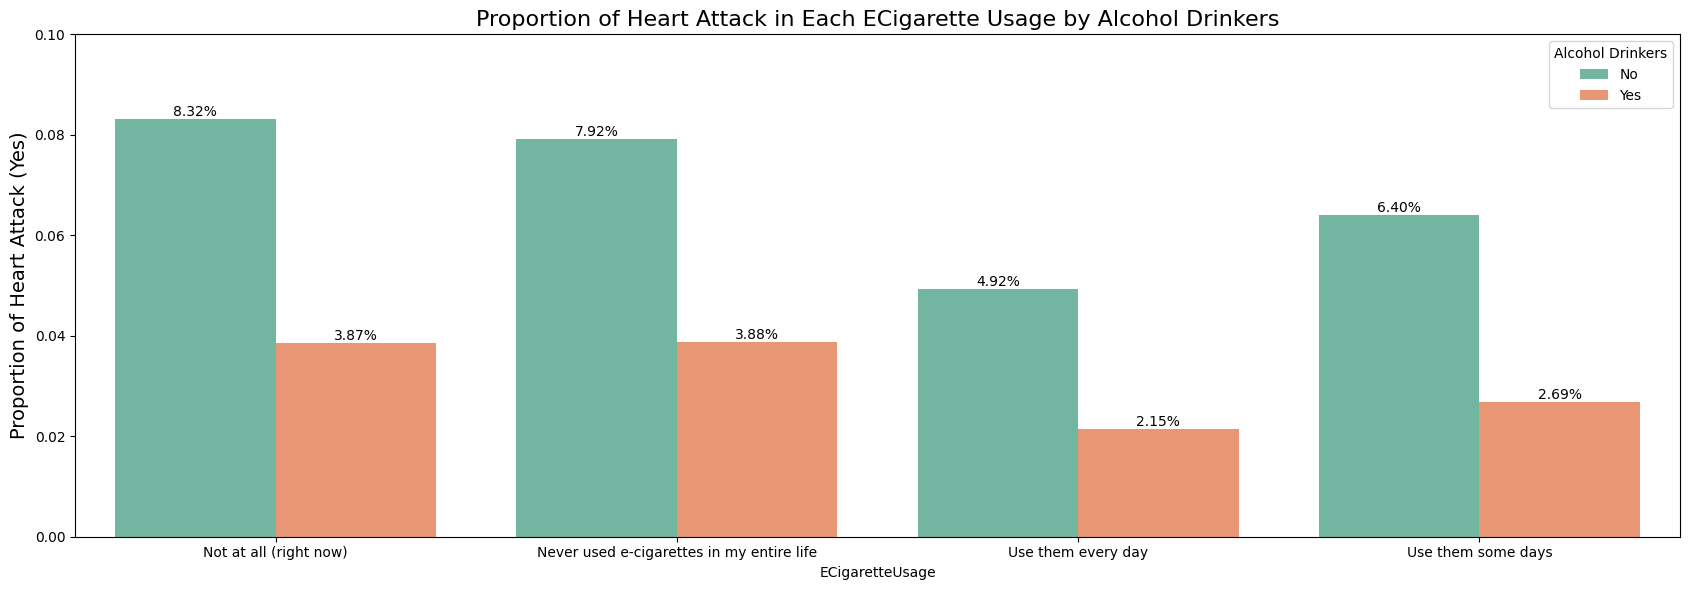

In [34]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='ECigaretteUsage',
    y='HadHeartAttack',
    hue='AlcoholDrinkers',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each ECigarette Usage by Alcohol Drinkers', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.1) 
plt.legend(title='Alcohol Drinkers')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

##### Had Angina & Had Stroke vs Heart Disease

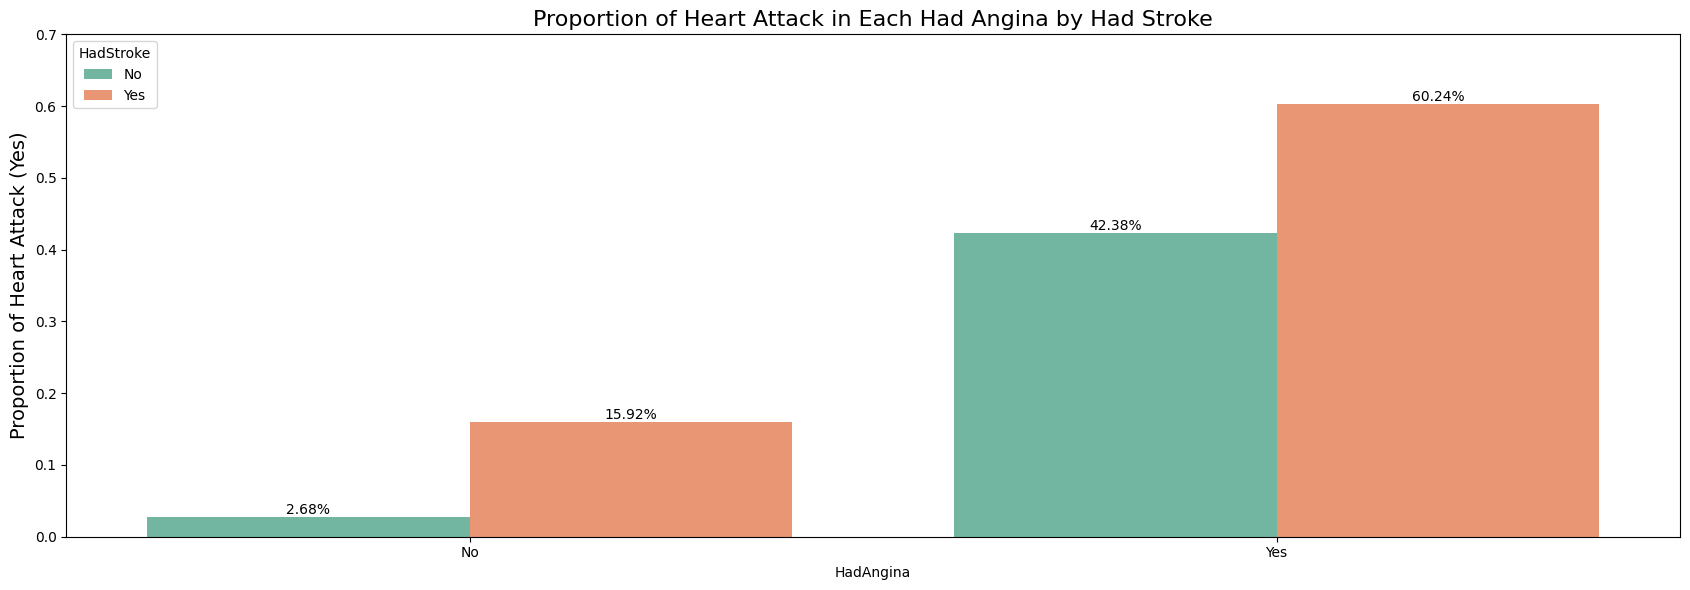

In [35]:
plt.figure(figsize=(17, 6))
ax = sns.barplot(
    data=df,
    x='HadAngina',
    y='HadHeartAttack',
    hue='HadStroke',
    estimator=np.mean, 
    palette='Set2',
    errorbar=None
)

plt.title('Proportion of Heart Attack in Each Had Angina by Had Stroke', fontsize=16)
plt.ylabel('Proportion of Heart Attack (Yes)', fontsize=14)
plt.xticks()
plt.ylim(0, 0.7) 
plt.legend(title='HadStroke')


for container in ax.containers:
    ax.bar_label(container, labels=[f'{v.get_height()*100:.2f}%' for v in container], label_type='edge', fontsize=10)

plt.tight_layout()
plt.show()

### Outliers

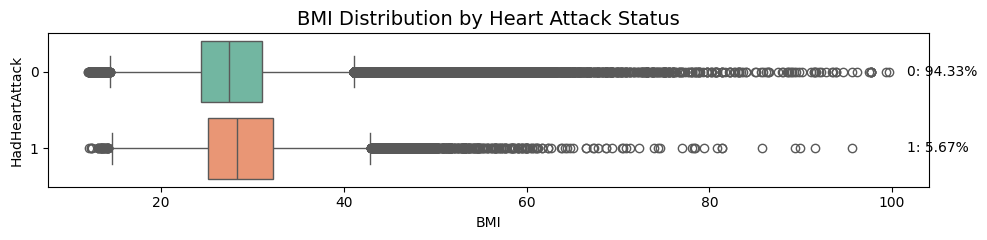

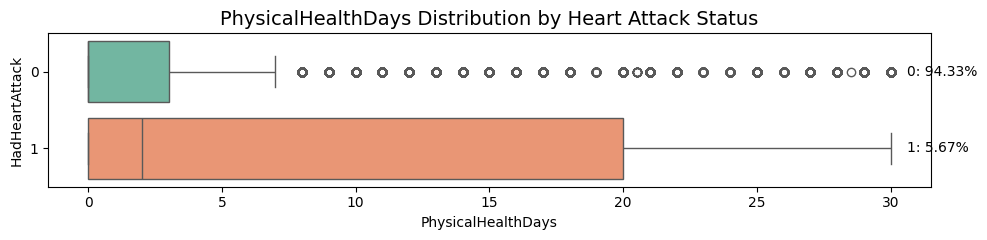

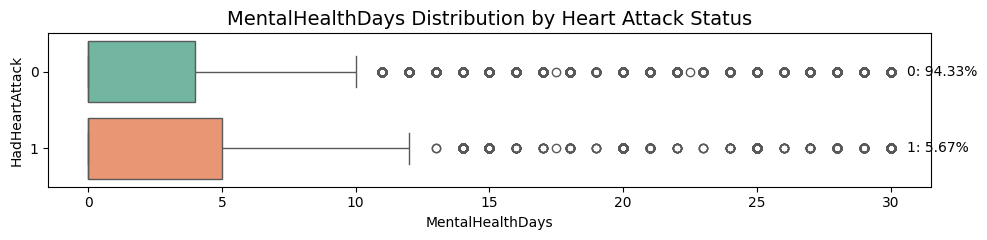

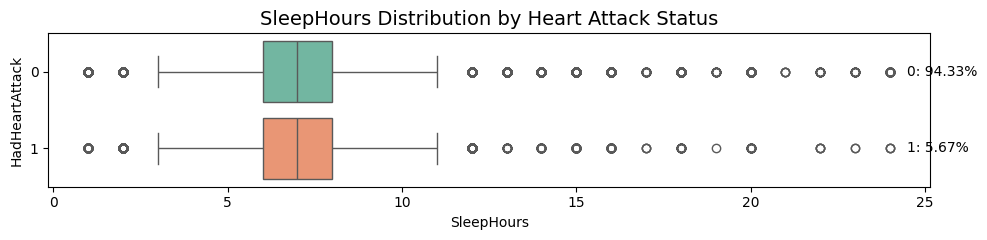

In [17]:
# Features to plot
features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours']

# Loop through each feature to generate the boxplots
for feature in features:
    plt.figure(figsize=(10, 2.5), dpi=100)
    
    # Create the boxplot
    ax = sns.boxplot(
        data=df,
        x=feature,
        y='HadHeartAttack',
        orient='h',
        hue='HadHeartAttack',  # Add hue to avoid the warning
        palette='Set2',
        legend=False  # Disable the legend
    )
    
    # Title for the plot
    plt.title(f'{feature} Distribution by Heart Attack Status', fontsize=14)
    
    # Calculate proportions for each 'HadHeartAttack' category
    counts = df['HadHeartAttack'].value_counts()
    total = counts.sum()
    
    # Prepare the labels with percentages
    labels = []
    for category in df['HadHeartAttack'].unique():
        if pd.isna(category):
            continue
        ratio = counts[category] / total * 100
        labels.append(f"{category}: {ratio:.2f}%")
    
    # Adding labels with proportions to the plot
    for i, label in enumerate(labels):
        ax.text(
            df[feature].max() * 1.02,  # Position of the label (adjusted to the max value of the feature)
            i,  # Position of the label in the 'HadHeartAttack' categories
            label,
            verticalalignment='center',
            fontsize=10,
            color='black'
        )
    
    # Ensure the layout fits and displays the plot
    plt.tight_layout()
    plt.show()


> Add methods to deal with outliers

#### For global outliers

In [18]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("src"), '..')))
from src.data_preprocessing.outlier_transformation import transform_outliers, plot_transformed, check_normality, qq_plot

##### Log Transformation

In [19]:
df_transformed = transform_outliers(df, 'BMI', method='log')

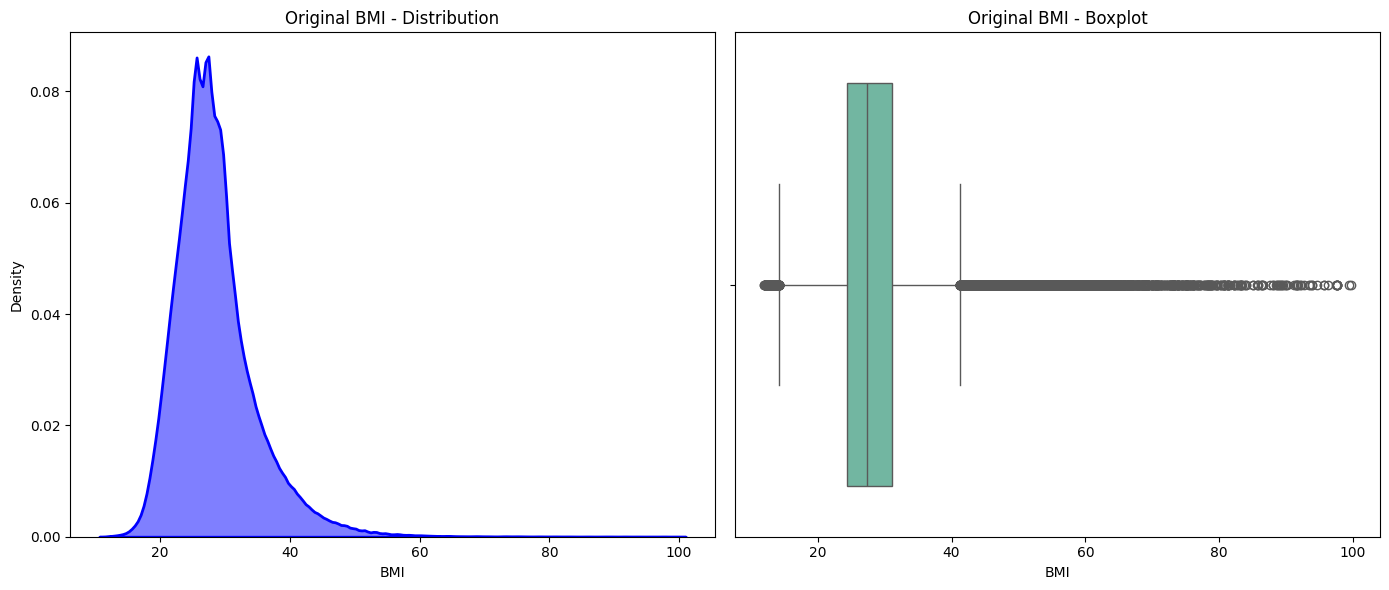

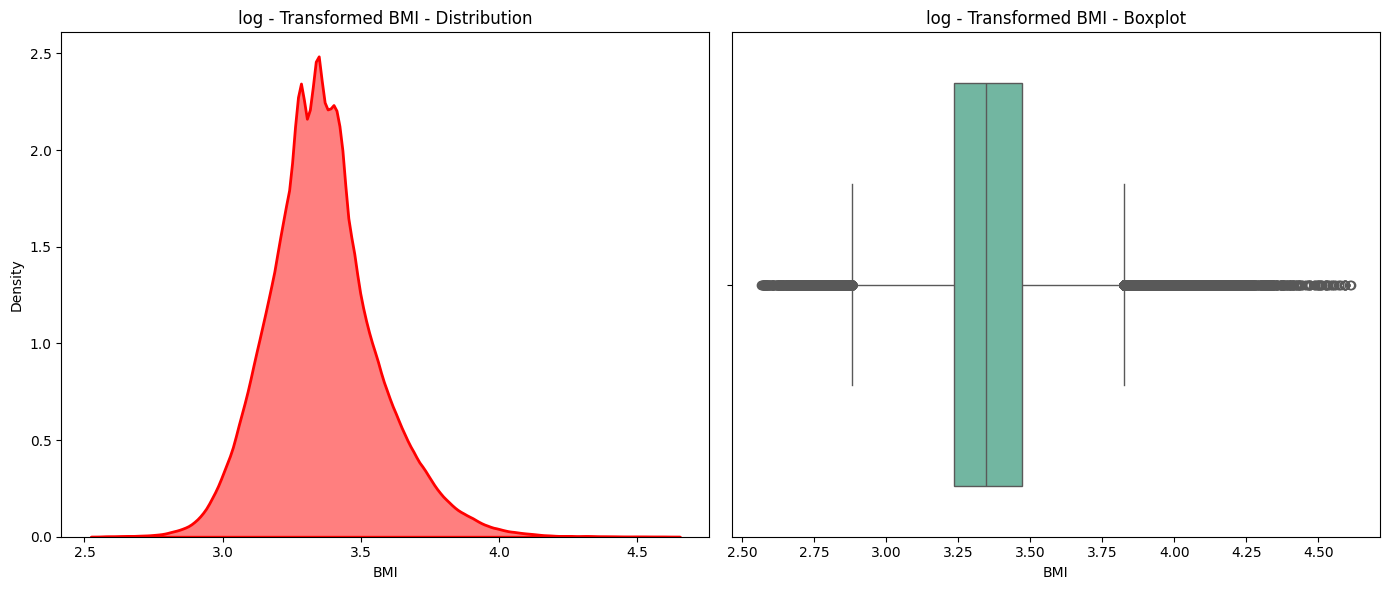

In [44]:
plot_transformed(df, 'BMI', df_transformed, 'BMI', method='log')

In [20]:
# Check normality after transformation
check_normality(df_transformed, 'BMI', method='log')

Shapiro-Wilk Test (log): Statistic = 0.9848352959072096, p-value = 3.163426191204272e-89
log transformation: The data is likely not normally distributed.


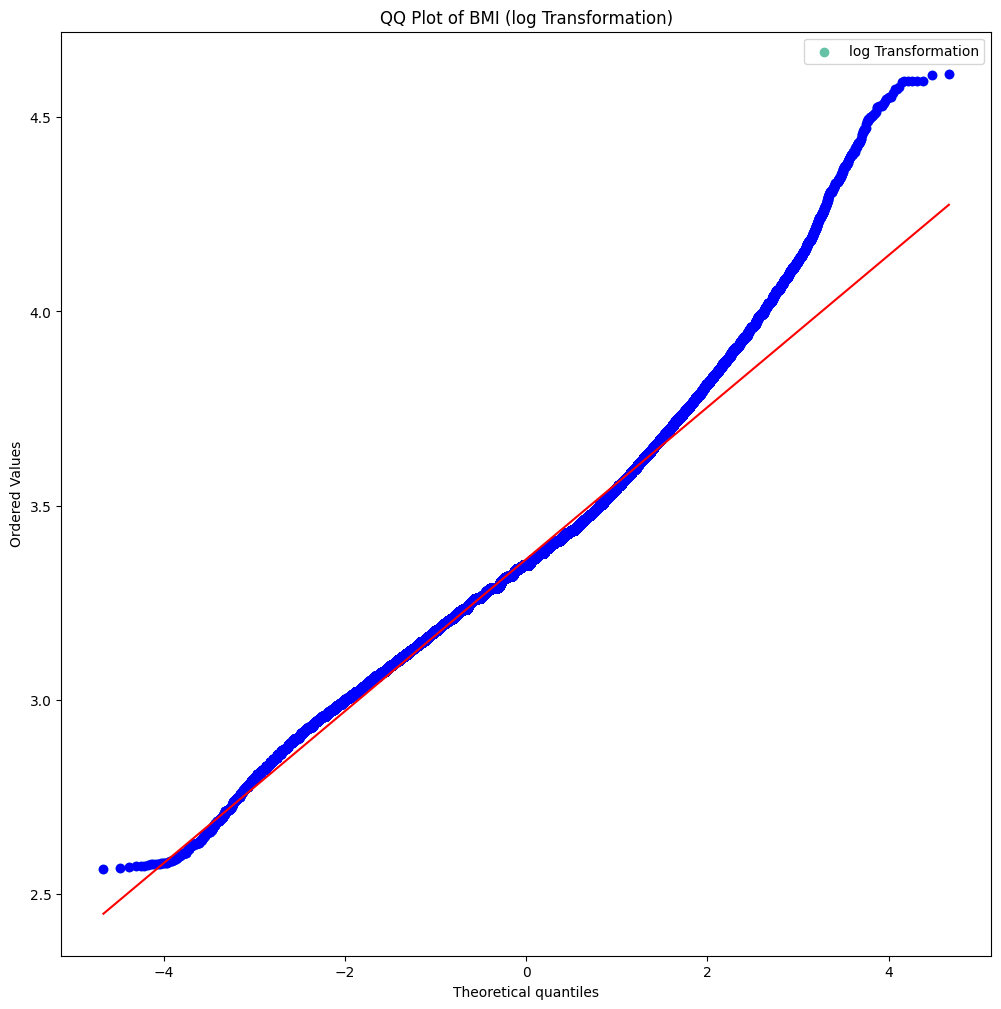

In [46]:
# QQ Plot to check normality visually
qq_plot(df_transformed, 'BMI', method='log')

> Try z_score, IQR, boxcox ...

##### local anomalies(outliers)
> Try  Local Outlier Factor (LOF) or Isolation Forest for detecting local anomalies

### Output new final data

In [21]:
output_path = '../data/cleaned/heart_2022_cleaned_01.csv'
df.to_csv(output_path, index=False)